In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/neurips-open-polymer-prediction-2025/sample_submission.csv
/kaggle/input/neurips-open-polymer-prediction-2025/train.csv
/kaggle/input/neurips-open-polymer-prediction-2025/test.csv
/kaggle/input/testing-test/receipt (7).pdf
/kaggle/input/pm-85554240-at-06-30-2025-16-38-25/__script__.py
/kaggle/input/pm-85554240-at-06-30-2025-16-38-25/numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl
/kaggle/input/pm-85554240-at-06-30-2025-16-38-25/pillow-11.2.1-cp311-cp311-manylinux_2_28_x86_64.whl
/kaggle/input/pm-85554240-at-06-30-2025-16-38-25/__results__.html
/kaggle/input/pm-85554240-at-06-30-2025-16-38-25/rdkit-2025.3.3-cp311-cp311-manylinux_2_28_x86_64.whl
/kaggle/input/pm-85554240-at-06-30-2025-16-38-25/input_requirements.txt
/kaggle/input/pm-85554240-at-06-30-2025-16-38-25/__script__.ipynb
/kaggle/input/pm-85554240-at-06-30-2025-16-38-25/__output__.json
/kaggle/input/pm-85554240-at-06-30-2025-16-38-25/install_requirements.sh
/kaggle/input/pm-85554240-at-06-30-2025-16-38-25/custom.

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas display options for better viewing
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Load the datasets (adjust file paths as necessary)
try:
    train_df = pd.read_csv('/kaggle/input/neurips-open-polymer-prediction-2025/train.csv')
    test_df = pd.read_csv('/kaggle/input/neurips-open-polymer-prediction-2025/test.csv')
    sample_submission_df = pd.read_csv('/kaggle/input/neurips-open-polymer-prediction-2025/sample_submission.csv')
except FileNotFoundError:
    print("Ensure 'train.csv', 'test.csv', and 'sample_submission.csv' are in the same directory.")

print("\nTrain Data Head:")
print(train_df.head())
print("\nTest Data Head:")
print(test_df.head())
print("\nsample_submission_df Data Head:")
print(sample_submission_df.head())


Train Data Head:
       id                                             SMILES  Tg       FFV        Tc  Density  Rg
0   87817                         *CC(*)c1ccccc1C(=O)OCCCCCC NaN  0.374645  0.205667      NaN NaN
1  106919  *Nc1ccc([C@H](CCC)c2ccc(C3(c4ccc([C@@H](CCC)c5... NaN  0.370410       NaN      NaN NaN
2  388772  *Oc1ccc(S(=O)(=O)c2ccc(Oc3ccc(C4(c5ccc(Oc6ccc(... NaN  0.378860       NaN      NaN NaN
3  519416  *Nc1ccc(-c2c(-c3ccc(C)cc3)c(-c3ccc(C)cc3)c(N*)... NaN  0.387324       NaN      NaN NaN
4  539187  *Oc1ccc(OC(=O)c2cc(OCCCCCCCCCOCC3CCCN3c3ccc([N... NaN  0.355470       NaN      NaN NaN

Test Data Head:
           id                                             SMILES
0  1109053969  *Oc1ccc(C=NN=Cc2ccc(Oc3ccc(C(c4ccc(*)cc4)(C(F)...
1  1422188626  *Oc1ccc(C(C)(C)c2ccc(Oc3ccc(C(=O)c4cccc(C(=O)c...
2  2032016830  *c1cccc(OCCCCCCCCOc2cccc(N3C(=O)c4ccc(-c5cccc6...

sample_submission_df Data Head:
           id  Tg  FFV  Tc  Density  Rg
0  1109053969   0    0   0        0   0
1  1


--- EDA: Initial Data Inspection ---

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       7973 non-null   int64  
 1   SMILES   7973 non-null   object 
 2   Tg       511 non-null    float64
 3   FFV      7030 non-null   float64
 4   Tc       737 non-null    float64
 5   Density  613 non-null    float64
 6   Rg       614 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 436.2+ KB

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      3 non-null      int64 
 1   SMILES  3 non-null      object
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes

Train Data Missing Values:
id            0
SMILES        0
Tg         7462
FFV         943
Tc         7236
Density 

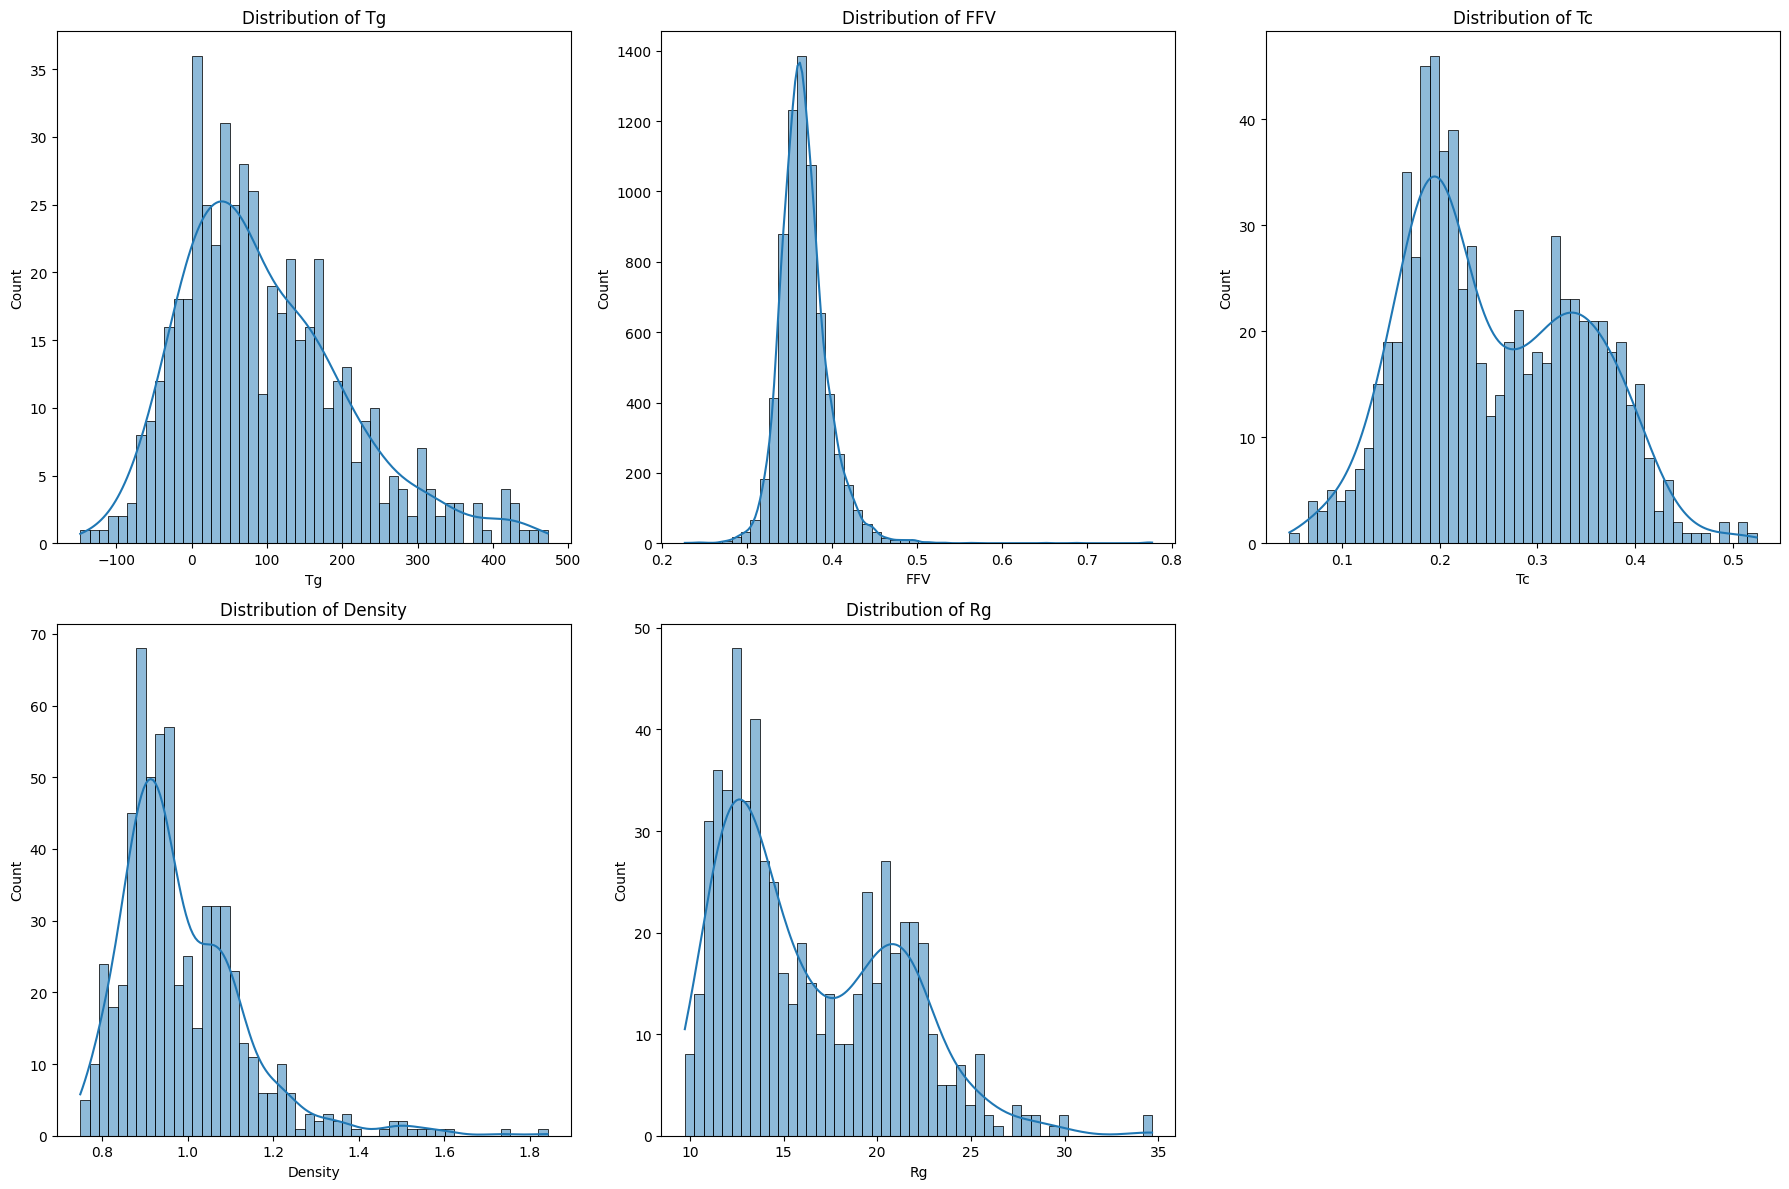


--- EDA: Correlation Matrix of Polymer Properties ---


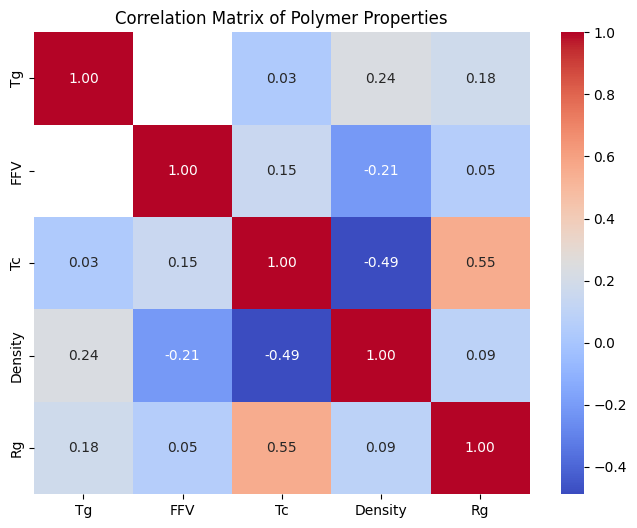


--- EDA: Outlier Detection (Box Plots) ---


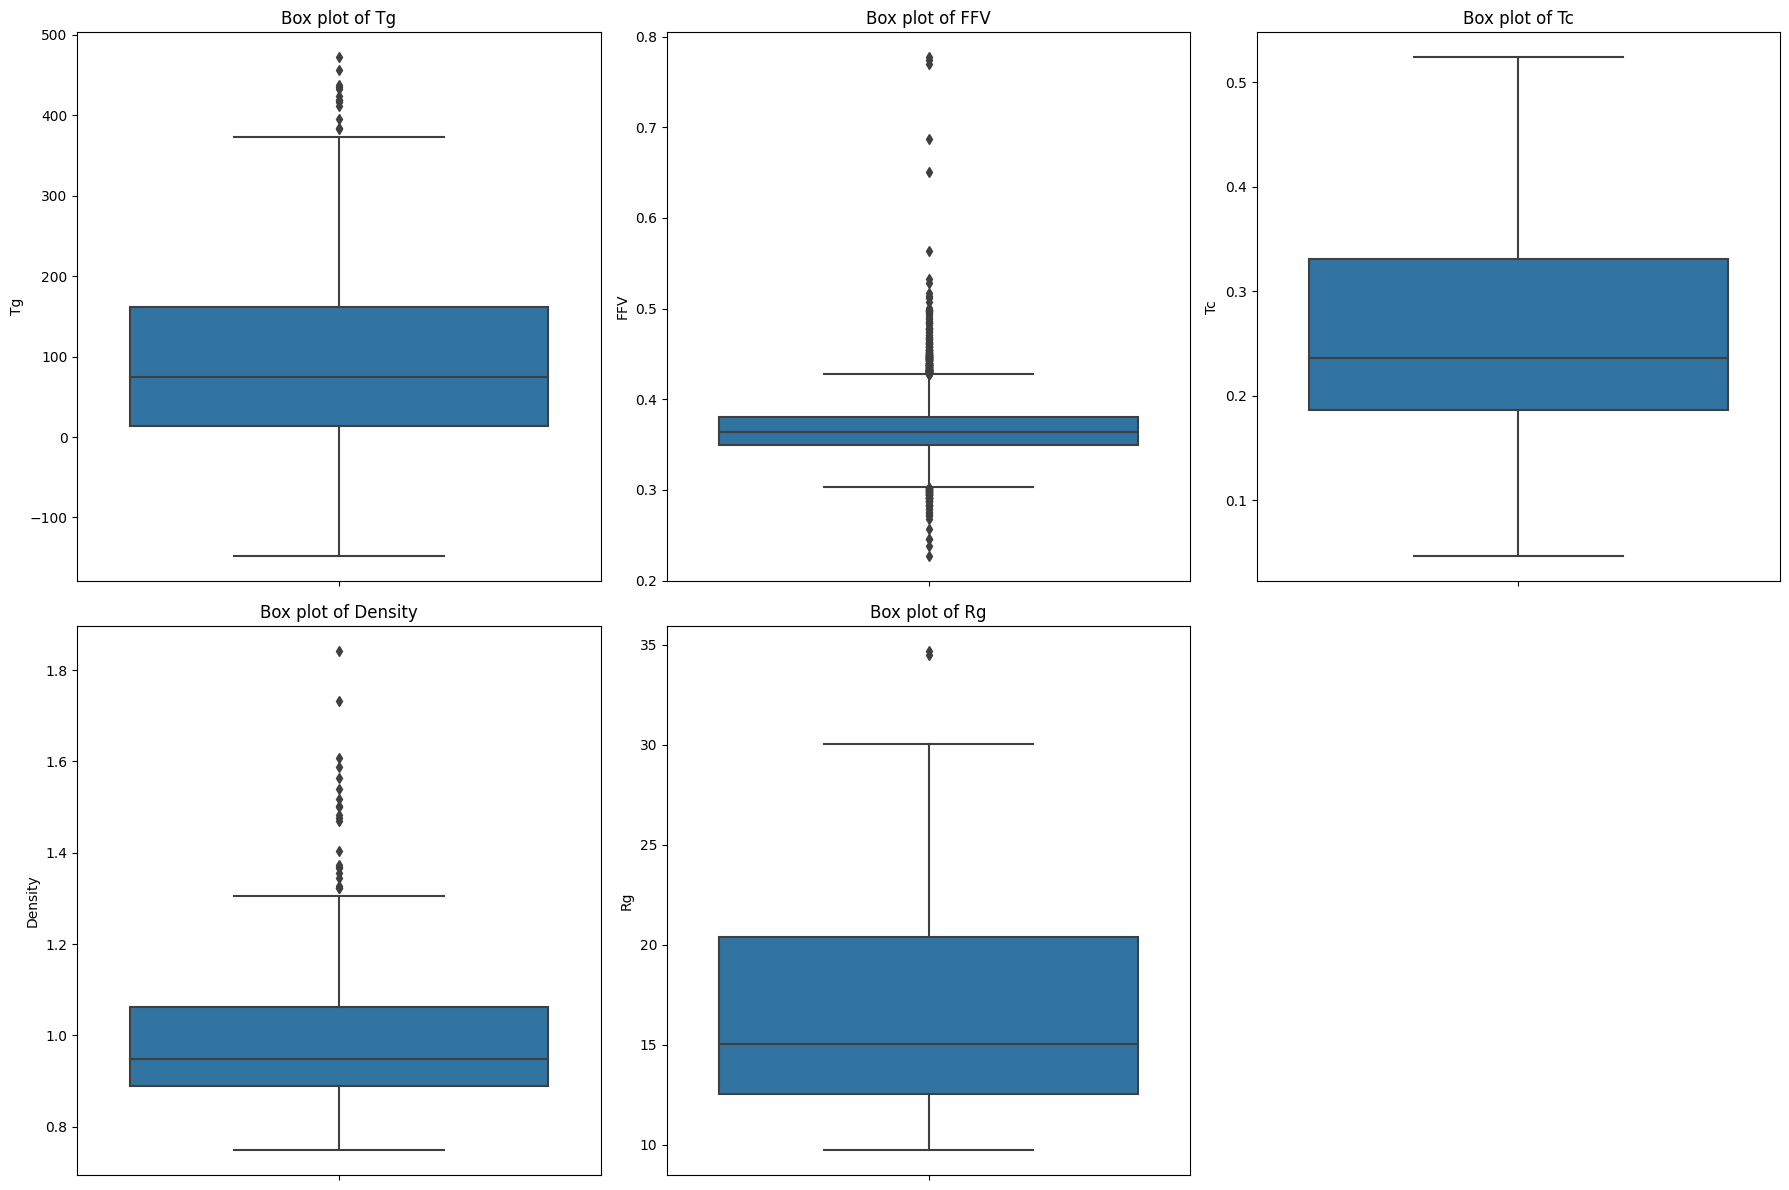


--- EDA: SMILES String Length Distribution ---


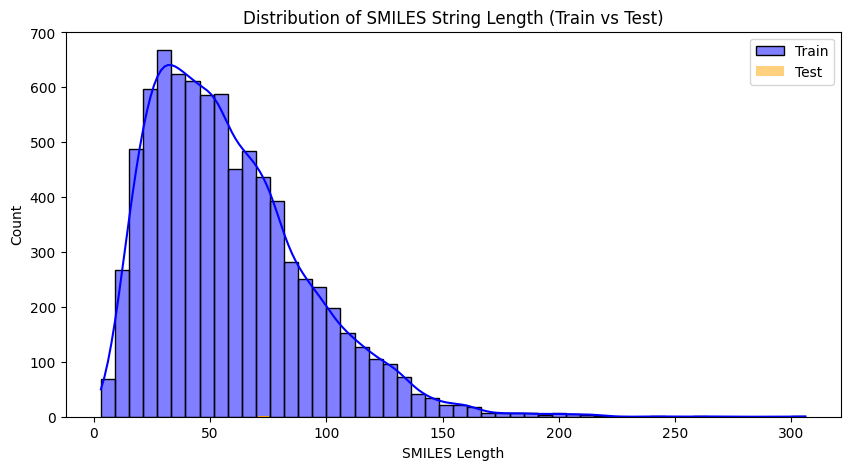


--- EDA: Validating SMILES Strings and Converting to RDKit Mol Objects ---


  0%|          | 0/7973 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Number of invalid SMILES in train set: 0 (0.00%)
Number of invalid SMILES in test set: 0 (0.00%)

Train data shape after dropping invalid SMILES: (7973, 9)
Test data shape after dropping invalid SMILES: (3, 4)

--- EDA: Estimated wMAE Property Weights (from training data) ---
{'Tg': 0.0023488144576415894, 'FFV': 0.19251144295466505, 'Tc': 2.1155161363061876, 'Density': 1.111864198473772, 'Rg': 0.0486086044270598}


In [4]:
print("\n--- EDA: Initial Data Inspection ---")
print("\nTrain Data Info:")
train_df.info()
print("\nTest Data Info:")
test_df.info()

print("\nTrain Data Missing Values:")
print(train_df.isnull().sum())
print("\nTest Data Missing Values:")
print(test_df.isnull().sum()) # Should only have missing target values

print("\nTrain Data Describe (Target Properties):")
print(train_df.describe())

print(f"\nNumber of unique SMILES strings in train: {train_df['SMILES'].nunique()}")
print(f"Number of unique SMILES strings in test: {test_df['SMILES'].nunique()}")

# --- EDA: Understanding Target Variables ---
properties = ['Tg', 'FFV', 'Tc', 'Density', 'Rg']
print("\n--- EDA: Target Property Distributions ---")
plt.figure(figsize=(18, 12))
for i, prop in enumerate(properties):
    plt.subplot(2, 3, i + 1)
    sns.histplot(train_df[prop].dropna(), kde=True, bins=50)
    plt.title(f'Distribution of {prop}')
    plt.xlabel(prop)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

print("\n--- EDA: Correlation Matrix of Polymer Properties ---")
plt.figure(figsize=(8, 6))
sns.heatmap(train_df[properties].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Polymer Properties')
plt.show()

print("\n--- EDA: Outlier Detection (Box Plots) ---")
plt.figure(figsize=(18, 12))
for i, prop in enumerate(properties):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=train_df[prop].dropna())
    plt.title(f'Box plot of {prop}')
    plt.ylabel(prop)
plt.tight_layout()
plt.show()

# --- EDA: Exploring SMILES Strings ---
print("\n--- EDA: SMILES String Length Distribution ---")
train_df['SMILES_len'] = train_df['SMILES'].apply(len)
test_df['SMILES_len'] = test_df['SMILES'].apply(len)

plt.figure(figsize=(10, 5))
sns.histplot(train_df['SMILES_len'], kde=True, bins=50, color='blue', label='Train')
sns.histplot(test_df['SMILES_len'], kde=True, bins=50, color='orange', label='Test')
plt.title('Distribution of SMILES String Length (Train vs Test)')
plt.xlabel('SMILES Length')
plt.ylabel('Count')
plt.legend()
plt.show()

# --- EDA: Basic SMILES Validation & RDKit Integration ---
tqdm.pandas() # Enable progress_apply for pandas

def smiles_to_mol(smiles):
    try:
        mol = Chem.MolFromSmiles(smiles)
        # Canonicalize SMILES to standardize representation
        if mol:
            return Chem.MolFromSmiles(Chem.MolToSmiles(mol))
        return None
    except:
        return None

print("\n--- EDA: Validating SMILES Strings and Converting to RDKit Mol Objects ---")
train_df['Mol'] = train_df['SMILES'].progress_apply(smiles_to_mol)
test_df['Mol'] = test_df['SMILES'].progress_apply(smiles_to_mol)

invalid_train_smiles = train_df['Mol'].isnull().sum()
invalid_test_smiles = test_df['Mol'].isnull().sum()

print(f"Number of invalid SMILES in train set: {invalid_train_smiles} ({invalid_train_smiles / len(train_df) * 100:.2f}%)")
print(f"Number of invalid SMILES in test set: {invalid_test_smiles} ({invalid_test_smiles / len(test_df) * 100:.2f}%)")

# Filter out invalid SMILES for further featurization (or handle specifically)
# For this example, we'll drop them. In a real competition, you might try to fix simple errors.
train_df.dropna(subset=['Mol'], inplace=True)
test_df.dropna(subset=['Mol'], inplace=True)
print(f"\nTrain data shape after dropping invalid SMILES: {train_df.shape}")
print(f"Test data shape after dropping invalid SMILES: {test_df.shape}")


# --- EDA: Estimated wMAE Weights (from training data) ---
print("\n--- EDA: Estimated wMAE Property Weights (from training data) ---")
K = len(properties)
ranges = {}
counts = {}
for prop in properties:
    ranges[prop] = train_df[prop].max() - train_df[prop].min()
    counts[prop] = train_df[prop].count()

sum_inv_ni = sum(1/counts[prop] for prop in properties)
estimated_weights = {}
for prop in properties:
    wi = (1/ranges[prop]) * (K * (1/counts[prop]) / sum_inv_ni)
    estimated_weights[prop] = wi
print(estimated_weights)

# Add estimated weights to the main dataframe for easier use later if desired
# Not strictly necessary but useful for visualization/analysis
# train_df['weight_Tg'] = estimated_weights['Tg'] # etc.

In [5]:
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, module='rdkit')
print("\n--- Feature Engineering: Generating Molecular Descriptors and Fingerprints ---")

def generate_rdkit_features(mol):
    if mol is None:
        return {} # Return empty dict if mol object is invalid

    features = {}
    # Physicochemical Descriptors
    features['MolWt'] = Descriptors.MolWt(mol)
    features['MolLogP'] = Descriptors.MolLogP(mol)
    features['TPSA'] = Descriptors.TPSA(mol)
    features['NumHDonors'] = Descriptors.NumHDonors(mol)
    features['NumHAcceptors'] = Descriptors.NumHAcceptors(mol)
    features['NumRotatableBonds'] = Descriptors.NumRotatableBonds(mol)
    features['NumAromaticRings'] = Descriptors.NumAromaticRings(mol)
    features['NumAliphaticRings'] = Descriptors.NumAliphaticRings(mol)
    features['NumSaturatedRings'] = Descriptors.NumSaturatedRings(mol)
    features['NumHeteroatoms'] = Descriptors.NumHeteroatoms(mol)
    features['FractionCSP3'] = Descriptors.FractionCSP3(mol)
    features['RingCount'] = Descriptors.RingCount(mol)
    features['HeavyAtomCount'] = Descriptors.HeavyAtomCount(mol)
    features['NumAmideBonds'] = AllChem.CalcNumAmideBonds(mol) # Example of specific bond count
    # You can add many more descriptors from Descriptors module
    # or use Chem.rdMolDescriptors.CalcMolDescriptors(mol) to get a large set

    return features

def generate_morgan_fingerprints(mol, radius=2, nbits=2048):
    if mol is None:
        return np.array([np.nan] * nbits)
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=nbits)
    return np.array(list(fp.ToBitString())).astype(int)

# Apply feature generation
print("Generating RDKit descriptors for train data...")
desc_train = train_df['Mol'].progress_apply(generate_rdkit_features)
desc_train_df = pd.DataFrame(desc_train.tolist())

print("Generating RDKit descriptors for test data...")
desc_test = test_df['Mol'].progress_apply(generate_rdkit_features)
desc_test_df = pd.DataFrame(desc_test.tolist())

print("Generating Morgan fingerprints for train data...")
fp_train = train_df['Mol'].progress_apply(lambda x: generate_morgan_fingerprints(x, radius=2, nbits=2048))
fp_train_df = pd.DataFrame(fp_train.tolist(), index=train_df.index,
                           columns=[f'morgan_fp_{i}' for i in range(2048)])

print("Generating Morgan fingerprints for test data...")
fp_test = test_df['Mol'].progress_apply(lambda x: generate_morgan_fingerprints(x, radius=2, nbits=2048))
fp_test_df = pd.DataFrame(fp_test.tolist(), index=test_df.index,
                          columns=[f'morgan_fp_{i}' for i in range(2048)])

# Combine all features
X_train = pd.concat([desc_train_df, fp_train_df], axis=1)
X_test = pd.concat([desc_test_df, fp_test_df], axis=1)

y_train = train_df[properties]

print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")

# Handle any remaining NaN values in features (e.g., from invalid mol objects if not dropped)
# Impute with mean/median or drop rows if necessary
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_train.mean(), inplace=True) # Impute test with train mean to avoid data leakage


--- Feature Engineering: Generating Molecular Descriptors and Fingerprints ---
Generating RDKit descriptors for train data...


  0%|          | 0/7973 [00:00<?, ?it/s]

Generating RDKit descriptors for test data...


  0%|          | 0/3 [00:00<?, ?it/s]

Generating Morgan fingerprints for train data...


  0%|          | 0/7973 [00:00<?, ?it/s]

[16:39:39] DEPRECATION WARNING: please use MorganGenerator
[16:39:39] DEPRECATION WARNING: please use MorganGenerator
[16:39:39] DEPRECATION WARNING: please use MorganGenerator
[16:39:39] DEPRECATION WARNING: please use MorganGenerator
[16:39:39] DEPRECATION WARNING: please use MorganGenerator
[16:39:39] DEPRECATION WARNING: please use MorganGenerator
[16:39:39] DEPRECATION WARNING: please use MorganGenerator
[16:39:39] DEPRECATION WARNING: please use MorganGenerator
[16:39:39] DEPRECATION WARNING: please use MorganGenerator
[16:39:39] DEPRECATION WARNING: please use MorganGenerator
[16:39:39] DEPRECATION WARNING: please use MorganGenerator
[16:39:39] DEPRECATION WARNING: please use MorganGenerator
[16:39:39] DEPRECATION WARNING: please use MorganGenerator
[16:39:39] DEPRECATION WARNING: please use MorganGenerator
[16:39:39] DEPRECATION WARNING: please use MorganGenerator
[16:39:39] DEPRECATION WARNING: please use MorganGenerator
[16:39:39] DEPRECATION WARNING: please use MorganGenerat

Generating Morgan fingerprints for test data...


  0%|          | 0/3 [00:00<?, ?it/s]


Shape of X_train: (7973, 2062)
Shape of X_test: (3, 2062)
Shape of y_train: (7973, 5)


[16:40:26] DEPRECATION WARNING: please use MorganGenerator
[16:40:26] DEPRECATION WARNING: please use MorganGenerator
[16:40:26] DEPRECATION WARNING: please use MorganGenerator


In [6]:
print("\n--- Model Selection & Training: XGBoost Multi-Output Regression ---")

import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error # For basic eval, wMAE will be custom

# Define the custom weighted MAE metric
def weighted_mae_metric(y_true, y_pred, weights, properties_list):
    total_wmae = 0
    for i, prop in enumerate(properties_list):
        # Only consider rows where y_true for this property is not NaN
        valid_indices = ~np.isnan(y_true[:, i])
        if np.any(valid_indices):
            abs_error = np.abs(y_pred[valid_indices, i] - y_true[valid_indices, i])
            total_wmae += weights[prop] * np.sum(abs_error)
    return total_wmae / len(y_true) # Divide by total number of samples

# Prepare data for model training
X = X_train.values
y = y_train.values # Convert y_train to numpy array

# Convert estimated_weights dict to a list ordered by 'properties' for easy lookup
# This assumes the 'properties' list always defines the order
weights_for_eval = {prop: estimated_weights[prop] for prop in properties}

# Initialize models for each property
models = {}
oof_preds = np.zeros(y.shape) # Out-of-fold predictions for stacking later
test_preds = np.zeros((X_test.shape[0], len(properties)))

N_SPLITS = 5
kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

for i, prop in enumerate(properties):
    print(f"\nTraining model for {prop}...")
    # Filter out NaN values for the current property
    prop_y_train = y[:, i]
    # Get valid indices for this property
    valid_indices = ~np.isnan(prop_y_train)

    X_prop_train = X[valid_indices]
    y_prop_train = prop_y_train[valid_indices]

    model = xgb.XGBRegressor(
        objective='reg:squarederror', # Standard regression objective
        n_estimators=1000,            # Number of boosting rounds
        learning_rate=0.05,
        max_depth=6,
        subsample=0.7,
        colsample_bytree=0.7,
        random_state=42,
        n_jobs=-1,                    # Use all available cores
        tree_method='hist',           # Faster for large datasets
        early_stopping_rounds=50      # Stop if no improvement for 50 rounds
    )

    prop_oof_preds = np.zeros(len(y_prop_train))
    prop_test_preds = np.zeros(X_test.shape[0])

    for fold, (train_idx, val_idx) in enumerate(kf.split(X_prop_train, y_prop_train)):
        print(f"  Fold {fold+1}/{N_SPLITS} for {prop}")
        X_train_fold, X_val_fold = X_prop_train[train_idx], X_prop_train[val_idx]
        y_train_fold, y_val_fold = y_prop_train[train_idx], y_prop_train[val_idx]

        model.fit(X_train_fold, y_train_fold,
                  eval_set=[(X_val_fold, y_val_fold)],
                  verbose=False)

        prop_oof_preds[val_idx] = model.predict(X_val_fold)
        prop_test_preds += model.predict(X_test) / N_SPLITS # Average predictions across folds

    models[prop] = model # Store the last trained model (or retrain on full data if preferred)
    oof_preds[valid_indices, i] = prop_oof_preds
    test_preds[:, i] = prop_test_preds

    # Evaluate MAE for this property
    current_mae = mean_absolute_error(y_prop_train, prop_oof_preds)
    print(f"  OOF MAE for {prop}: {current_mae:.4f}")

# Calculate overall weighted MAE for OOF predictions
print("\n--- Model Evaluation ---")
overall_wmae = weighted_mae_metric(y, oof_preds, weights_for_eval, properties)
print(f"\nOverall OOF Weighted MAE: {overall_wmae:.6f}")

# Display sample test predictions
print("\nSample Test Predictions:")
sample_test_preds_df = pd.DataFrame(test_preds, columns=properties)
print(sample_test_preds_df.head())


--- Model Selection & Training: XGBoost Multi-Output Regression ---

Training model for Tg...
  Fold 1/5 for Tg
  Fold 2/5 for Tg
  Fold 3/5 for Tg
  Fold 4/5 for Tg
  Fold 5/5 for Tg
  OOF MAE for Tg: 50.5973

Training model for FFV...
  Fold 1/5 for FFV
  Fold 2/5 for FFV
  Fold 3/5 for FFV
  Fold 4/5 for FFV
  Fold 5/5 for FFV
  OOF MAE for FFV: 0.0062

Training model for Tc...
  Fold 1/5 for Tc
  Fold 2/5 for Tc
  Fold 3/5 for Tc
  Fold 4/5 for Tc
  Fold 5/5 for Tc
  OOF MAE for Tc: 0.0282

Training model for Density...
  Fold 1/5 for Density
  Fold 2/5 for Density
  Fold 3/5 for Density
  Fold 4/5 for Density
  Fold 5/5 for Density
  OOF MAE for Density: 0.0349

Training model for Rg...
  Fold 1/5 for Rg
  Fold 2/5 for Rg
  Fold 3/5 for Rg
  Fold 4/5 for Rg
  Fold 5/5 for Rg
  OOF MAE for Rg: 1.5299

--- Model Evaluation ---

Overall OOF Weighted MAE: 0.022899

Sample Test Predictions:
           Tg       FFV        Tc   Density         Rg
0  151.990620  0.374812  0.200437  1.194

In [7]:
print("\n--- Generating Submission File ---")

# Ensure test_df has 'Id' column that matches submission format
# And that the order of predictions matches the sample submission 'id'
submission_df = sample_submission_df.copy()

# Map the predicted values to the correct 'id's
# Important: ensure the order of predictions aligns with the original test_df 'Id's
# If test_df was re-indexed due to dropping rows, you'll need to re-align
# For simplicity here, we assume test_df's original IDs are maintained and in order
test_ids = test_df['id'].values
predicted_results = pd.DataFrame(test_preds, columns=properties)
predicted_results['id'] = test_ids

# Merge with the sample submission to ensure correct ID order and all columns
final_submission_df = pd.merge(submission_df[['id']], predicted_results, on='id', how='left')

# Fill any potential NaNs in prediction columns (shouldn't happen if all test SMILES were valid)
final_submission_df[properties] = final_submission_df[properties].fillna(0.0) # Or appropriate default

print("\nFinal Submission DataFrame Head:")
print(final_submission_df.head())

# Save the submission file
submission_filename = 'submission.csv'
final_submission_df.to_csv(submission_filename, index=False)
print(f"\nSubmission file '{submission_filename}' created successfully!")


--- Generating Submission File ---

Final Submission DataFrame Head:
           id          Tg       FFV        Tc   Density         Rg
0  1109053969  151.990620  0.374812  0.200437  1.194561  22.205774
1  1422188626  157.149591  0.379524  0.234573  1.087704  20.979149
2  2032016830   96.067490  0.352704  0.294581  1.121032  20.101210

Submission file 'submission.csv' created successfully!
